In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
import pylab as p
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [2]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [4]:
# reads the data from the given file
data_train = pd.read_csv('C:\\Users\\HP\\CCFD\\training_data.csv')
data_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,...,0.452662,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,...,0.173407,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,...,0.599251,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,...,-0.036664,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90


In [5]:
data_test = pd.read_csv('C:\\Users\\HP\\CCFD\\testing_data.csv')
data_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,48807,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,...,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,15.38
1,40941,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,...,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,1.00
2,46525,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,...,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,778.00
3,42859,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,...,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,141.75
4,44051,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,...,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,191.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,40270,-1.026431,-0.718597,2.291596,-3.057681,-1.304122,-0.766397,-0.441554,0.144293,-2.060949,...,-0.548218,0.045393,0.188862,-0.223333,0.449730,0.367339,-0.380917,-0.118735,0.084634,51.60
14276,19649,-6.446671,3.659475,-4.911782,1.401546,-3.845502,-1.221395,-2.211515,4.047933,0.756492,...,-0.087022,0.095589,-0.080367,-0.228818,0.292166,-0.294013,-0.448384,0.188717,-0.046614,89.99
14277,33946,-0.636005,1.705460,1.179507,2.088935,1.030706,1.162806,0.658290,0.056382,-1.140353,...,0.688449,-0.366179,-0.658901,-0.247957,-1.423067,-0.117154,0.028495,0.429521,0.074814,5.52
14278,38721,0.460469,0.176916,-0.078363,-0.650061,-1.211166,-0.682273,-0.829807,0.467589,-0.687301,...,-0.011232,0.042495,0.001436,0.556212,0.006420,-1.161134,-0.564934,-0.015079,-0.134042,9.99


In [6]:
trn_labels = pd.read_csv('C:\\Users\\HP\\CCFD\\train_data_classlabels.csv')
trn_labels

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57111,0.0
57112,0.0
57113,0.0
57114,0.0


In [7]:
data = pd.concat([data_train,trn_labels], axis = 1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10,0.0
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95,0.0
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95,0.0
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60,0.0
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,...,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74,0.0
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,...,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12,0.0
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,...,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00,0.0
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,...,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90,0.0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,...,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000
mean,34983.116097,-0.247795,-0.022058,0.679284,0.169507,-0.269839,0.099197,-0.111731,0.053520,0.013406,...,-0.029317,-0.106932,-0.037896,0.006357,0.134607,0.021532,0.002800,0.001178,96.941060,0.002486
std,14565.105294,1.864050,1.631035,1.410986,1.373157,1.377401,1.301175,1.247802,1.249071,1.157104,...,0.746801,0.639153,0.626419,0.597128,0.439791,0.497490,0.379231,0.295386,270.411899,0.049800
min,0.000000,-36.802320,-63.344698,-33.680984,-5.172595,-42.147898,-23.496714,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-7.976100,-9.617915,0.000000,0.000000
25%,28865.000000,-1.009543,-0.589424,0.192506,-0.723950,-0.887752,-0.640141,-0.601216,-0.143972,-0.675191,...,-0.226106,-0.525390,-0.177981,-0.324780,-0.129791,-0.329274,-0.063496,-0.006171,7.600000,0.000000
50%,38190.500000,-0.246743,0.074316,0.768041,0.189497,-0.301686,-0.151700,-0.071382,0.065374,-0.073948,...,-0.060934,-0.081307,-0.049691,0.062927,0.172505,-0.076244,0.009027,0.022540,26.265000,0.000000
75%,46008.250000,1.153809,0.724232,1.399763,1.052439,0.268297,0.491501,0.423102,0.345135,0.663857,...,0.115353,0.307514,0.080841,0.403506,0.421531,0.300119,0.082192,0.075379,88.000000,0.000000
max,54280.000000,1.634039,18.902453,4.101716,16.715537,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,19656.530000,1.000000


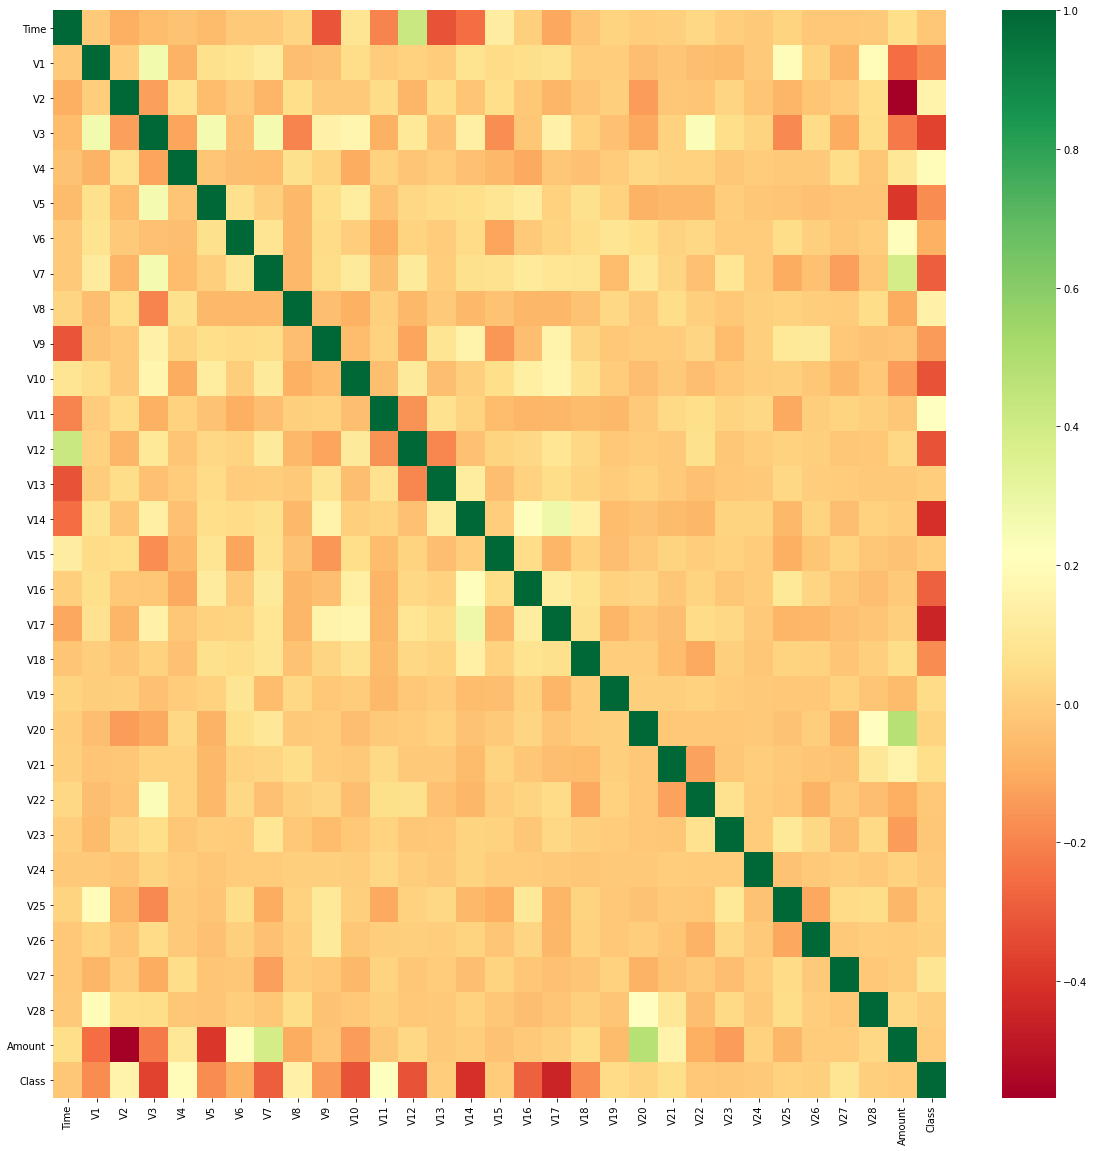

In [9]:
# finding any correlation btw the various attributes
plt.figure(figsize=(20,20))
#sns.heatmap(data.corr(method='pearson'),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})
sns.heatmap(data.corr(method='pearson'),cmap = 'RdYlGn')
plt.show()

In [10]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
amt=data['Amount']

In [11]:
fraud.shape

(142, 31)

In [12]:
# Checking the % distribution of normal vs fraud
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

print(normal_share)
print(fraud_share)

99.75138315008054
0.24861684991946215


In [13]:
len(normal)

56974

In [14]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10,0.0
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95,0.0
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95,0.0
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60,0.0
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,31552,0.458761,-2.050144,-0.466434,-0.042731,-1.449051,-0.904008,0.379405,-0.383444,-0.750893,...,-0.160474,-1.002111,-0.428028,0.451232,0.230248,1.041581,-0.165922,0.081869,496.74,0.0
57112,42544,0.954816,-0.719838,0.901751,0.080120,-0.814359,0.654128,-0.647104,0.285089,0.819952,...,-0.105128,-0.227548,-0.042204,-0.192197,0.070007,0.961082,-0.034767,0.016900,109.12,0.0
57113,41172,-0.926829,-0.886473,2.370167,0.300101,-2.076338,1.149399,0.555557,0.376249,1.209615,...,0.165073,0.376110,0.677804,0.472248,-0.166598,1.069099,-0.068823,0.045220,333.00,0.0
57114,41560,0.939876,-0.143305,0.409470,1.401199,-0.315610,0.041466,0.057357,0.118171,0.069849,...,0.011079,0.015211,-0.121116,0.225331,0.559770,-0.350135,0.017372,0.021977,94.90,0.0


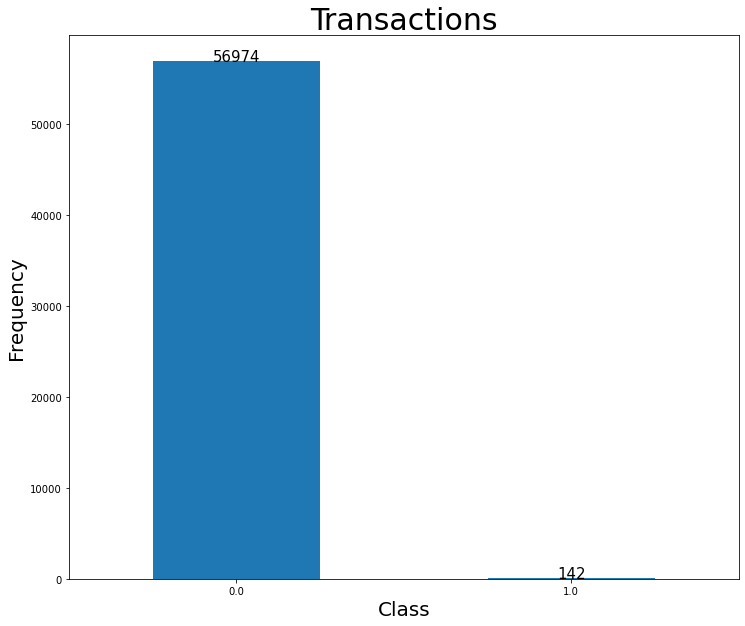

In [15]:
#y_vals= np.arange(0,200000)
#plt.bar(fraud,y_vals)
#plt.bar(normal,y_vals)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i] , ha = 'center' , fontsize = 15)

plt.figure(figsize=(12,10))
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xlabel('Class', fontsize = 20)
plt.ylabel('Frequency' , fontsize = 20)
plt.title('Transactions',fontsize = 30)
x = ['Normal','Fraud']
y = [56974 , 142]
addlabels(x, y)
plt.show()

## Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
scaler.transform(data_train)

array([[9.38098747e-01, 9.85758297e-01, 7.71979119e-01, ...,
        4.17461818e-01, 6.30165341e-01, 3.87148698e-03],
       [6.39959469e-01, 9.91154594e-01, 7.72031148e-01, ...,
        4.15568426e-01, 6.29175801e-01, 3.02698391e-04],
       [2.04310980e-01, 9.48321204e-01, 7.77644192e-01, ...,
        4.14857657e-01, 6.30927868e-01, 7.60561503e-04],
       ...,
       [7.58511422e-01, 9.33373796e-01, 7.59396820e-01, ...,
        4.13737091e-01, 6.31718438e-01, 1.69409351e-02],
       [7.65659543e-01, 9.81939921e-01, 7.68432617e-01, ...,
        4.18247110e-01, 6.30198945e-01, 4.82791215e-03],
       [9.74742078e-01, 9.98903667e-01, 7.59836004e-01, ...,
        4.16857147e-01, 6.27835852e-01, 5.08736791e-07]])

In [17]:
data_train = scaler.transform(data_train)
data_train = pd.DataFrame(data_train)
data_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.938099,0.985758,0.771979,0.894629,0.280838,0.552308,0.501688,0.468063,0.783887,0.450890,...,0.287779,0.608280,0.520361,0.602152,0.420792,0.630061,0.363181,0.417462,0.630165,3.871487e-03
1,0.639959,0.991155,0.772031,0.896614,0.261022,0.549275,0.495493,0.464138,0.783503,0.480928,...,0.284615,0.607282,0.519977,0.603587,0.404574,0.622250,0.502139,0.415568,0.629176,3.026984e-04
2,0.204311,0.948321,0.777644,0.944397,0.217884,0.547412,0.501916,0.465493,0.786100,0.522432,...,0.285128,0.607284,0.524625,0.603983,0.460440,0.552053,0.580039,0.414858,0.630928,7.605615e-04
3,0.427303,0.904158,0.782391,0.937132,0.309464,0.538067,0.519657,0.452890,0.797548,0.533205,...,0.289015,0.607815,0.530818,0.601982,0.419916,0.600704,0.410500,0.430813,0.627722,3.896924e-03
4,0.709856,0.949949,0.780886,0.938745,0.276856,0.554421,0.492146,0.482478,0.778603,0.458572,...,0.287534,0.607415,0.533517,0.602715,0.517629,0.561053,0.354908,0.401340,0.608636,1.553682e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57111,0.581282,0.969423,0.745248,0.879094,0.234367,0.533775,0.490868,0.469657,0.781272,0.433659,...,0.294404,0.603529,0.463283,0.597587,0.479904,0.593356,0.590896,0.408657,0.634114,2.527099e-02
57112,0.783788,0.982329,0.761423,0.915306,0.239980,0.542099,0.524722,0.454659,0.788444,0.513492,...,0.289347,0.604493,0.499416,0.606346,0.385988,0.581049,0.577594,0.415519,0.629867,5.551336e-03
57113,0.758511,0.933374,0.759397,0.954171,0.250030,0.525548,0.535482,0.472231,0.789421,0.533295,...,0.297058,0.609196,0.527577,0.622692,0.482972,0.562878,0.595443,0.413737,0.631718,1.694094e-02
57114,0.765660,0.981940,0.768433,0.902277,0.300336,0.548640,0.511410,0.464951,0.786653,0.475370,...,0.285543,0.606516,0.510741,0.604555,0.446931,0.618663,0.360924,0.418247,0.630199,4.827912e-03


### Splitting into train_test_split

In [31]:
# Splitting the dataset using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, trn_labels , random_state=100, test_size=0.20 , stratify = trn_labels)

In [32]:
print(np.sum(trn_labels))
print(np.sum(y_train))
print(np.sum(y_test))

Class    142.0
dtype: float64
Class    114.0
dtype: float64
Class    28.0
dtype: float64


## Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11396
         1.0       0.11      0.86      0.19        28

    accuracy                           0.98     11424
   macro avg       0.55      0.92      0.59     11424
weighted avg       1.00      0.98      0.99     11424



In [39]:
gnb_tune = GridSearchCV(gnb, param_grid={'var_smoothing': [0.00000001, 0.000000001, 0.00000001]},cv=5, scoring='accuracy').fit(X_train,y_train)
pred_train = gnb_tune.predict(y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11396
         1.0       0.11      0.86      0.19        28

    accuracy                           0.98     11424
   macro avg       0.55      0.92      0.59     11424
weighted avg       1.00      0.98      0.99     11424



## KNN 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred=classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.92      0.82      0.87        28

    accuracy                           1.00     11424
   macro avg       0.96      0.91      0.93     11424
weighted avg       1.00      1.00      1.00     11424



In [55]:
knn_tune = GridSearchCV(classifier, param_grid={'n_neighbors': [5,10], 'leaf_size': [5, 10],},cv=5, scoring='accuracy').fit(X_train,y_train)
pred_train = knn_tune.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.92      0.82      0.87        28

    accuracy                           1.00     11424
   macro avg       0.96      0.91      0.93     11424
weighted avg       1.00      1.00      1.00     11424



## SVM 

In [49]:
from sklearn.svm import SVC
  
svc_model = SVC(C = .1, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test) 

In [50]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9987744025212291
0.9989495798319328


In [51]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.81      0.75      0.78        28

    accuracy                           1.00     11424
   macro avg       0.90      0.87      0.89     11424
weighted avg       1.00      1.00      1.00     11424



## Adaboost

In [45]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train, y_train)

In [46]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9992121848739496


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.85      0.82      0.84        28

    accuracy                           1.00     11424
   macro avg       0.93      0.91      0.92     11424
weighted avg       1.00      1.00      1.00     11424



## Random Forest

In [56]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [57]:
classifier_rf.oob_score_

0.999430972599142

In [58]:
y_pred = classifier_rf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11396
         1.0       0.92      0.82      0.87        28

    accuracy                           1.00     11424
   macro avg       0.96      0.91      0.93     11424
weighted avg       1.00      1.00      1.00     11424



## Conclusion

- KNN and Random Forest gave the highest f1 macro score.

# Predicting the test labels

In [63]:
data_t = pd.DataFrame(scaler.transform(data_test))

In [87]:
values = {26 : np.mean(data_t.notnull().iloc[:, 26]), 27 : np.mean(data_t.notnull().iloc[:, 27]), 28 : np.mean(data_t.notnull().iloc[:, 28]), 29 : np.mean(data_t.notnull().iloc[:, 29])}
data_tt = data_t.fillna(value = values)
perd = classifier.predict(data_tt)

In [92]:
np.savetxt(r'hardik_soni_labels.txt', perd, fmt = '%d')

In [95]:
pmd



NameError: name 'pmd' is not defined

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote